For the questions 6 and 7, the results can be loaded at the end of the corresponding code. 

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize/2
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


#im = generate_a_rectangle(10, True)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#im = generate_a_disk(10)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#[im, v] = generate_a_triangle(20, False)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

### 3 Simple Classification

In [71]:
[X_train, Y_train] = generate_dataset_classification(300,20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


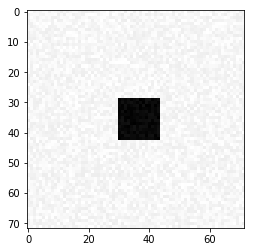

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.imshow(X_train[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap = "gray")

In [73]:
print(Y_train.shape)
print(Y_train[0:3])
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 3)
print(Y_train[0])

(300,)
[0. 0. 1.]
[1. 0. 0.]


In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
model = Sequential()
model.add(Dense(3, activation='softmax' ))

In [75]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=16, epochs=50, verbose=1)

Epoch 1/50
300/300 [==============================] - 1s 2ms/step - loss: 0.9450 - acc: 0.5667
Epoch 2/50
300/300 [==============================] - 0s 87us/step - loss: 0.4745 - acc: 0.8233
Epoch 3/50
300/300 [==============================] - 0s 82us/step - loss: 0.3263 - acc: 0.8633
Epoch 4/50
300/300 [==============================] - 0s 88us/step - loss: 0.3573 - acc: 0.8467
Epoch 5/50
300/300 [==============================] - 0s 85us/step - loss: 0.2727 - acc: 0.9100
Epoch 6/50
300/300 [==============================] - 0s 85us/step - loss: 0.2165 - acc: 0.9267
Epoch 7/50
300/300 [==============================] - 0s 82us/step - loss: 0.1870 - acc: 0.9667
Epoch 8/50
300/300 [==============================] - 0s 84us/step - loss: 0.2003 - acc: 0.9400
Epoch 9/50
300/300 [==============================] - 0s 83us/step - loss: 0.1779 - acc: 0.9500
Epoch 10/50
300/300 [==============================] - 0s 80us/step - loss: 0.1417 - acc: 0.9733
Epoch 11/50
300/300 [===================

In [76]:
[X_train_2, Y_train_2] = generate_dataset_classification(300,20)
Y_train_2 = np_utils.to_categorical(Y_train_2, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [77]:
model_2 = Sequential()
model_2.add(Dense(3, activation='softmax'))

In [78]:
model_2.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [79]:
model_2.fit(X_train_2, Y_train_2, batch_size=16, epochs=100, verbose=1)

Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 1.1203 - acc: 0.5133
Epoch 2/100
300/300 [==============================] - 0s 90us/step - loss: 0.4670 - acc: 0.8600
Epoch 3/100
300/300 [==============================] - 0s 89us/step - loss: 0.3482 - acc: 0.8600
Epoch 4/100
300/300 [==============================] - 0s 88us/step - loss: 0.3208 - acc: 0.8833
Epoch 5/100
300/300 [==============================] - 0s 92us/step - loss: 0.2267 - acc: 0.9333
Epoch 6/100
300/300 [==============================] - 0s 92us/step - loss: 0.2040 - acc: 0.9267
Epoch 7/100
300/300 [==============================] - 0s 94us/step - loss: 0.1660 - acc: 0.9500
Epoch 8/100
300/300 [==============================] - 0s 91us/step - loss: 0.1508 - acc: 0.9600
Epoch 9/100
300/300 [==============================] - 0s 91us/step - loss: 0.1344 - acc: 0.9567
Epoch 10/100
300/300 [==============================] - 0s 87us/step - loss: 0.1160 - acc: 0.9767
Epoch 11/100
300/300 [========

In [80]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)


array([[0., 1., 0.]], dtype=float32)

In [81]:
X_test_2 = generate_a_disk()
X_test_2 = X_test_2.reshape(1, X_test_2.shape[0])
model_2.predict(X_test_2)

array([[0., 1., 0.]], dtype=float32)

### 4 Visualization of the Solution

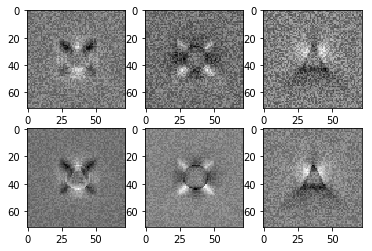

In [82]:
plt.subplot(231)
plt.imshow(model.get_weights()[0].take([0],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(232)
plt.imshow(model.get_weights()[0].take([1],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(233)
plt.imshow(model.get_weights()[0].take([2],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(234)
plt.imshow(model_2.get_weights()[0].take([0],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(235)
plt.imshow(model_2.get_weights()[0].take([1],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(236)
plt.imshow(model_2.get_weights()[0].take([2],axis=1).reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### 5 A More Difficult Classification Problem

In [83]:

[X_train_2_2, Y_train_2_2] = generate_dataset_classification(300,20,True)
Y_train_2_2 = np_utils.to_categorical(Y_train_2_2, 3)

model_2_2 = Sequential()
model_2_2.add(Dense(3, activation='softmax'))
model_2_2.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
model_2.fit(X_train_2_2, Y_train_2_2, batch_size=32, epochs=20, verbose=1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 4.6950 - acc: 0.3867
Epoch 2/20
300/300 [==============================] - 0s 68us/step - loss: 3.7070 - acc: 0.3967
Epoch 3/20
300/300 [==============================] - 0s 62us/step - loss: 4.1757 - acc: 0.3767
Epoch 4/20
300/300 [==============================] - 0s 58us/step - loss: 2.8727 - acc: 0.4833
Epoch 5/20
300/300 [==============================] - 0s 57us/step - loss: 2.3063 - acc: 0.4767
Epoch 6/20
300/300 [==============================] - 0s 56us/step - loss: 2.3820 - acc: 0.5467
Epoch 7/20
300/300 [==============================] - 0s 59us/step - loss: 1.6609 - acc: 0.5133
Epoch 8/20
300/300 [==============================] - 0s 62us/step - loss: 1.7163 - acc: 0.5833
Epoch 9/20
300/300 [==============================] - 0s 58us/step - loss: 1.7443 - acc: 0.5233
Epoch 10/20
3

In [84]:
[X_test_2_2, Y_test_2_2] = generate_test_set_classification()
model_2_2.evaluate(X_test_2_2, Y_test_2_2)
#This model doesn't seem to go over an accuracy of 60%

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 1s 2ms/step


[1.2428528467814128, 0.35333333353201546]

In [94]:
[X_train_3, Y_train_3] = generate_dataset_classification(10000, 20, True)

Y_train_3 = np_utils.to_categorical(Y_train_3, 3)

X_train_3 = X_train_3.reshape(X_train_3.shape[0], 72, 72, 1)
X_train_3 = X_train_3.astype('float32')
X_train_3 /= 255

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [97]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
#model_3 is the one described in the document
model_3 = Sequential()

model_3.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())

model_3.add(Dense(3, activation='softmax'))
model_3.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 55491     
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________


In [98]:
model_3.fit(X_train_3, Y_train_3, batch_size=32, epochs=200, verbose=1)

# batch_size=32, epochs=200, training_set=10 000: loss = 0.0766, acc = 0.9763

Epoch 1/200
10000/10000 [==============================] - 2s 183us/step - loss: 1.0209 - acc: 0.4889
Epoch 2/200
10000/10000 [==============================] - 1s 121us/step - loss: 0.8537 - acc: 0.5800
Epoch 3/200
10000/10000 [==============================] - 1s 121us/step - loss: 0.7970 - acc: 0.6046
Epoch 4/200
10000/10000 [==============================] - 1s 121us/step - loss: 0.7754 - acc: 0.6064
Epoch 5/200
10000/10000 [==============================] - 1s 115us/step - loss: 0.7618 - acc: 0.6168
Epoch 6/200
10000/10000 [==============================] - 1s 117us/step - loss: 0.7526 - acc: 0.6239
Epoch 7/200
10000/10000 [==============================] - 1s 116us/step - loss: 0.7435 - acc: 0.6224
Epoch 8/200
10000/10000 [==============================] - 1s 114us/step - loss: 0.7384 - acc: 0.6257
Epoch 9/200
10000/10000 [==============================] - 1s 141us/step - loss: 0.7313 - acc: 0.6320
Epoch 10/200
10000/10000 [==============================] - 1s 141us/step - loss: 

10000/10000 [==============================] - 1s 111us/step - loss: 0.1021 - acc: 0.9673
Epoch 160/200
10000/10000 [==============================] - 1s 118us/step - loss: 0.1024 - acc: 0.9674
Epoch 161/200
10000/10000 [==============================] - 1s 110us/step - loss: 0.1016 - acc: 0.9665
Epoch 162/200
10000/10000 [==============================] - 1s 106us/step - loss: 0.1022 - acc: 0.9663
Epoch 163/200
10000/10000 [==============================] - 1s 115us/step - loss: 0.0984 - acc: 0.9692
Epoch 164/200
10000/10000 [==============================] - 1s 121us/step - loss: 0.1001 - acc: 0.9684
Epoch 165/200
10000/10000 [==============================] - 1s 125us/step - loss: 0.0975 - acc: 0.9686
Epoch 166/200
10000/10000 [==============================] - 1s 135us/step - loss: 0.0968 - acc: 0.9678
Epoch 167/200
10000/10000 [==============================] - 1s 135us/step - loss: 0.0956 - acc: 0.9703
Epoch 168/200
10000/10000 [==============================] - 1s 129us/step - l

In [99]:
[X_test_3, Y_test_3] = generate_test_set_classification()

X_test_3 = X_test_3.reshape(X_test_3.shape[0],72,72,1)
X_test_3 = X_test_3.astype('float32')
X_test_3 /= 255
model_3.evaluate(X_test_3, Y_test_3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s 1ms/step


[0.1376190439860026, 0.9599999992052713]

### 6 A Regression Problem

In [28]:
#sort is used to make sure that the vertices of a triangle are always ordered in the same way
def sort(A1,A2,B1,B2,C1,C2):
    flag=True
    while flag==True:
        flag=False
        if (A2,A1)<(B2,B1):
            (A1,B1)=(B1,A1)
            (A2,B2)=(B2,A2)
            flag=True
        if (A2,A1)<(C2,C1):
            (C1,A1)=(A1,C1)
            (C2,A2)=(A2,C2)
            flag=True
        if (B2,B1)<(C2,C1):
            (C1,B1)=(B1,C1)
            (C2,B2)=(B2,C2)
            flag=True
    return([A1,B1,C1],[A2,B2,C2])

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
        U,V=sort(U[0], V[0], U[1], V[1], U[2], V[2])
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im,V]=generate_a_triangle(0,True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap = "gray")
print(V)

In [30]:
[X_train_4, Y_train_4] = generate_dataset_regression(10000, 20)


X_train_4 = X_train_4.reshape(X_train_4.shape[0], 72, 72, 1)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

To solve this regression problem, we use an architecture similar to the top of the hourglass network (inspired by SegNet) built in the following question. We then add fully connected layers to obtain the desired results.

In [32]:
from keras.layers import Conv2D, BatchNormalization, Activation

def conv_block(input, filters, kernel_size, padding='valid', activation='relu'):
    conv = Conv2D(filters, kernel_size, padding=padding, activation='linear')(input)
    conv = BatchNormalization()(conv)
    conv = Activation(activation=activation)(conv)
    
    return conv

In [33]:
import keras.backend as K

def custom_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

In [54]:
from keras.layers import UpSampling2D, Input, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, Activation
from keras.models import Model
from keras.optimizers import Adam


input_image = Input(shape=(72,72,1,))
x = conv_block(input_image, 32, (5, 5), padding='same', activation = 'relu')
x = MaxPooling2D(pool_size=(2,2))(x)

x = conv_block(x, 64, (5, 5), padding='same', activation = 'relu')
x = MaxPooling2D(pool_size=(2,2))(x)

x = conv_block(x, 128, (5, 5), padding='same', activation = 'relu')
x = conv_block(x, 128, (5, 5), padding='same', activation = 'relu')
#This second convolutionnal block seems to be necessary in order to get a good result
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten() (x)

x = Dense(128, activation='linear') (x)
x = Activation(activation='relu')(x)

x = Dense(64, activation='linear') (x)
x = Activation(activation='relu')(x)


out = Dense(6, activation='sigmoid') (x)

model_4_2 = Model(inputs=input_image, outputs=out)
model_4_2.summary()
opt = Adam(lr=0.001)
model_4_2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[])
model_4_2.fit(X_train_4, Y_train_4, batch_size=32, epochs=250, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        832       
_________________________________________________________________
batch_normalization_9 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 36, 36, 64)        51264     
_________________________________________________________________
batch_normalization_10 (Batc (None, 36, 36, 64)        256       
__________

Epoch 146/250
 - 6s - loss: 0.0050
Epoch 147/250
 - 5s - loss: 0.0050
Epoch 148/250
 - 5s - loss: 0.0050
Epoch 149/250
 - 5s - loss: 0.0050
Epoch 150/250
 - 5s - loss: 0.0051
Epoch 151/250
 - 5s - loss: 0.0051
Epoch 152/250
 - 6s - loss: 0.0050
Epoch 153/250
 - 5s - loss: 0.0050
Epoch 154/250
 - 6s - loss: 0.0050
Epoch 155/250
 - 5s - loss: 0.0050
Epoch 156/250
 - 5s - loss: 0.0049
Epoch 157/250
 - 5s - loss: 0.0050
Epoch 158/250
 - 5s - loss: 0.0049
Epoch 159/250
 - 5s - loss: 0.0049
Epoch 160/250
 - 6s - loss: 0.0050
Epoch 161/250
 - 6s - loss: 0.0048
Epoch 162/250
 - 5s - loss: 0.0049
Epoch 163/250
 - 6s - loss: 0.0050
Epoch 164/250
 - 5s - loss: 0.0049
Epoch 165/250
 - 5s - loss: 0.0050
Epoch 166/250
 - 5s - loss: 0.0048
Epoch 167/250
 - 5s - loss: 0.0049
Epoch 168/250
 - 5s - loss: 0.0049
Epoch 169/250
 - 6s - loss: 0.0047
Epoch 170/250
 - 5s - loss: 0.0049
Epoch 171/250
 - 6s - loss: 0.0047
Epoch 172/250
 - 5s - loss: 0.0046
Epoch 173/250
 - 5s - loss: 0.0048
Epoch 174/250
 - 5s 

Here, we had to train the network again with a lower learning rate in order to have a satisfying result

In [57]:
opt = Adam(lr=0.0001)
model_4_2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[])
model_4_2.fit(X_train_4, Y_train_4, batch_size=32, epochs=250, verbose=2)

Epoch 1/250
 - 7s - loss: 0.0026
Epoch 2/250
 - 6s - loss: 0.0022
Epoch 3/250
 - 5s - loss: 0.0020
Epoch 4/250
 - 6s - loss: 0.0019
Epoch 5/250
 - 5s - loss: 0.0019
Epoch 6/250
 - 6s - loss: 0.0018
Epoch 7/250
 - 6s - loss: 0.0017
Epoch 8/250
 - 6s - loss: 0.0017
Epoch 9/250
 - 6s - loss: 0.0016
Epoch 10/250
 - 5s - loss: 0.0016
Epoch 11/250
 - 5s - loss: 0.0016
Epoch 12/250
 - 5s - loss: 0.0016
Epoch 13/250
 - 6s - loss: 0.0016
Epoch 14/250
 - 6s - loss: 0.0016
Epoch 15/250
 - 6s - loss: 0.0015
Epoch 16/250
 - 5s - loss: 0.0015
Epoch 17/250
 - 6s - loss: 0.0015
Epoch 18/250
 - 5s - loss: 0.0015
Epoch 19/250
 - 6s - loss: 0.0015
Epoch 20/250
 - 5s - loss: 0.0014
Epoch 21/250
 - 6s - loss: 0.0014
Epoch 22/250
 - 6s - loss: 0.0014
Epoch 23/250
 - 5s - loss: 0.0014
Epoch 24/250
 - 5s - loss: 0.0014
Epoch 25/250
 - 5s - loss: 0.0014
Epoch 26/250
 - 5s - loss: 0.0014
Epoch 27/250
 - 5s - loss: 0.0014
Epoch 28/250
 - 6s - loss: 0.0014
Epoch 29/250
 - 5s - loss: 0.0014
Epoch 30/250
 - 5s - lo

 - 6s - loss: 0.0010
Epoch 239/250
 - 6s - loss: 0.0010
Epoch 240/250
 - 6s - loss: 0.0011
Epoch 241/250
 - 6s - loss: 0.0010
Epoch 242/250
 - 6s - loss: 0.0010
Epoch 243/250
 - 5s - loss: 0.0010
Epoch 244/250
 - 6s - loss: 0.0010
Epoch 245/250
 - 5s - loss: 0.0011
Epoch 246/250
 - 6s - loss: 0.0011
Epoch 247/250
 - 5s - loss: 0.0010
Epoch 248/250
 - 6s - loss: 0.0010
Epoch 249/250
 - 6s - loss: 0.0010
Epoch 250/250
 - 6s - loss: 0.0010


In [61]:
model_4_2.save('regression_model_v3.h5')

In [58]:
[X_test_4, Y_test_4] = generate_test_set_regression()
X_test_4 = X_test_4.reshape(X_test_4.shape[0],72,72,1)
model_4_2.evaluate(X_test_4, Y_test_4)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s 1ms/step


0.009077084896465143

The result seems quite good, even for the more challenging examples such as nearly flat triangles. However, I have the feeling that my network could be optimized to be smaller.

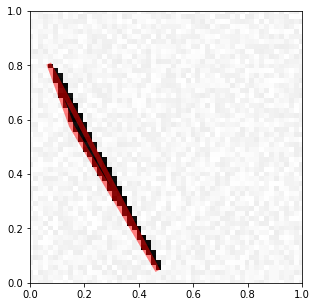

[[0.06886747 0.8060496  0.1528741  0.5766225  0.4695663  0.04455658]]


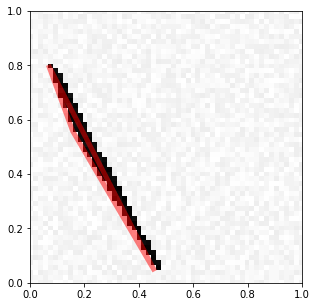

[0.06755264 0.80104846 0.15676026 0.5580319  0.45846096 0.04307497]


In [59]:
test_idx =62
t = X_test_4[test_idx].reshape(1,72,72,1)
result = model_4_2.predict(t)
visualize_prediction(X_test_4[test_idx], result)
print(result)
visualize_prediction(X_test_4[test_idx], Y_test_4[test_idx])
print(Y_test_4[test_idx])

In [38]:
from keras.models import load_model

loaded_model = load_model('regression_model_v3.h5')

In [106]:
test_idx =62
t = X_test_4[test_idx].reshape(1,72,72,1)
result = loaded_model.predict(t)
visualize_prediction(X_test_4[test_idx], result)
print(result)
visualize_prediction(X_test_4[test_idx], Y_test_4[test_idx])

NameError: name 'loaded_model' is not defined

### 7 Image Denoising

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
import matplotlib.patches as patches

def generate_a_drawing_noise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return [imdata, imdata_noise]

def generate_a_rectangle_noise(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_noise(figsize, U, V, noise)


def generate_a_disk_noise(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_noise(figsize, U, V, noise)


def generate_a_triangle_noise(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    [imdata, imdata_noise] = generate_a_drawing_noise(figsize, U, V, noise)
    return [imdata, imdata_noise]


def generate_dataset_classification_noise(nb_samples, max_noise, free_location=False):
    # Getting im_size:
    noise_levels = np.random.uniform(low=10., high=max_noise, size=nb_samples)
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
    
        noise = noise_levels[i]
        #we randomize the noise level
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            [Y[i], X[i]] = generate_a_rectangle_noise(noise, free_location)
        elif category == 1: 
            [Y[i], X[i]] = generate_a_disk_noise(noise, free_location)
        else:
            [Y[i], X[i]] = generate_a_triangle_noise(noise, free_location)
            
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]



Creating data:
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


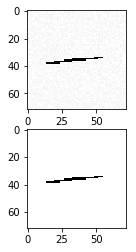

In [101]:
[X_train5, Y_train5] = generate_dataset_classification_noise(5000, 20, True)
X_train5 = X_train5.reshape(X_train5.shape[0], 72, 72, 1)
X_train5 = X_train5.astype('float32' )
X_train5 /= 255
Y_train5 = Y_train5.reshape(Y_train5.shape[0], 72, 72, 1)
Y_train5 = Y_train5.astype('float32' )
Y_train5 /= 255

plt.subplot(211)
plt.imshow(X_train5[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(212)
plt.imshow(Y_train5[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [102]:
[X_test_5, Y_test_5] = generate_dataset_classification_noise(1000, 20, True)
X_test_5 = X_test_5.reshape(X_test_5.shape[0], 72, 72, 1)
X_test_5 = X_test_5.astype('float32' )
X_test_5 /= 255
Y_test_5 = Y_test_5.reshape(Y_test_5.shape[0], 72, 72, 1)
Y_test_5 = Y_test_5.astype('float32' )
Y_test_5 /= 255

Creating data:
0
100
200
300
400
500
600
700
800
900


Here we create a convolutionnal block with BatchNormalization, following the SegNet architecture, in order to make the code clearer.

In [103]:
from keras.layers import BatchNormalization, Activation

def conv_block(input, filters, kernel_size, padding='valid', activation='relu'):
    conv = Conv2D(filters, kernel_size, padding=padding, activation='linear')(input)
    conv = BatchNormalization()(conv)
    conv = Activation(activation=activation)(conv)
    
    return conv

In [104]:
import keras.backend as K

def custom_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

In [105]:
from keras.layers import UpSampling2D, Input, Lambda, MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam

# We follow some ideas from SegNet-Basic for this architecture.

input_image = Input(shape=(72,72,1,))
x = conv_block(input_image, 8, (7, 7), padding='same', activation = 'relu')
x = conv_block(x, 8, (7, 7), padding='same', activation = 'relu')
x = MaxPooling2D(pool_size=(2,2),strides=2)(x)

x = conv_block(x, 16, (5, 5), padding='same', activation = 'relu')
x = conv_block(x, 16, (5, 5), padding='same', activation = 'relu')
x = MaxPooling2D(pool_size=(2,2),strides=2)(x)

x = conv_block(x, 32, (3, 3), padding='same', activation = 'relu')
x = conv_block(x, 32, (3, 3), padding='same', activation = 'relu')
x = conv_block(x, 32, (3, 3), padding='same', activation = 'relu')
x = MaxPooling2D(pool_size=(2,2),strides=2)(x)

x = UpSampling2D(size=(2,2))(x)
x = conv_block(x, 32, (3, 3), padding='same', activation = 'relu')
x = conv_block(x, 32, (3, 3), padding='same', activation = 'relu')
x = conv_block(x, 32, (3, 3), padding='same', activation = 'relu')

x = UpSampling2D(size=(2,2))(x)
x = conv_block(x, 16, (5, 5), padding='same', activation = 'relu')
x = conv_block(x, 16, (5, 5), padding='same', activation = 'relu')

x = UpSampling2D(size=(2,2))(x)
x = conv_block(x, 8, (7, 7), padding='same', activation = 'relu')
x = conv_block(x, 8, (7, 7), padding='same', activation = 'relu')
out = Conv2D(1, (1, 1), padding='valid', activation='sigmoid')(x)

model_5 = Model(inputs=input_image, outputs=out)
model_5.summary()

opt = Adam(lr=0.001)
model_5.compile(optimizer=opt, loss=custom_loss, metrics=[])
model_5.fit(X_train5, Y_train5, batch_size=64, epochs=500, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 8)         400       
_________________________________________________________________
batch_normalization_13 (Batc (None, 72, 72, 8)         32        
_________________________________________________________________
activation_19 (Activation)   (None, 72, 72, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 8)         3144      
_________________________________________________________________
batch_normalization_14 (Batc (None, 72, 72, 8)         32        
_________________________________________________________________
activation_20 (Activation)   (None, 72, 72, 8)         0         
__________

Epoch 37/500
 - 3s - loss: 4.9882e-04
Epoch 38/500
 - 3s - loss: 4.9215e-04
Epoch 39/500
 - 4s - loss: 4.6413e-04
Epoch 40/500
 - 4s - loss: 4.4025e-04
Epoch 41/500
 - 3s - loss: 4.2912e-04
Epoch 42/500
 - 3s - loss: 4.1195e-04
Epoch 43/500
 - 3s - loss: 6.3277e-04
Epoch 44/500
 - 3s - loss: 4.2591e-04
Epoch 45/500
 - 3s - loss: 4.8127e-04
Epoch 46/500
 - 4s - loss: 3.4033e-04
Epoch 47/500
 - 4s - loss: 3.2416e-04
Epoch 48/500
 - 4s - loss: 3.2310e-04
Epoch 49/500
 - 3s - loss: 3.4382e-04
Epoch 50/500
 - 4s - loss: 3.1434e-04
Epoch 51/500
 - 3s - loss: 3.8029e-04
Epoch 52/500
 - 4s - loss: 3.3717e-04
Epoch 53/500
 - 4s - loss: 3.2458e-04
Epoch 54/500
 - 3s - loss: 3.6521e-04
Epoch 55/500
 - 4s - loss: 3.3162e-04
Epoch 56/500
 - 4s - loss: 2.6997e-04
Epoch 57/500
 - 4s - loss: 3.4004e-04
Epoch 58/500
 - 4s - loss: 2.8742e-04
Epoch 59/500
 - 4s - loss: 2.5979e-04
Epoch 60/500
 - 3s - loss: 3.5799e-04
Epoch 61/500
 - 4s - loss: 2.4594e-04
Epoch 62/500
 - 4s - loss: 2.7422e-04
Epoch 63/500

 - 3s - loss: 9.6601e-05
Epoch 250/500
 - 3s - loss: 6.2351e-05
Epoch 251/500
 - 3s - loss: 2.9580e-05
Epoch 252/500
 - 3s - loss: 4.0393e-05
Epoch 253/500
 - 3s - loss: 1.4351e-04
Epoch 254/500
 - 3s - loss: 1.7573e-04
Epoch 255/500
 - 3s - loss: 7.3667e-05
Epoch 256/500
 - 3s - loss: 3.4426e-05
Epoch 257/500
 - 3s - loss: 5.1552e-05
Epoch 258/500
 - 3s - loss: 4.2831e-05
Epoch 259/500
 - 3s - loss: 8.0059e-05
Epoch 260/500
 - 3s - loss: 4.0032e-05
Epoch 261/500
 - 3s - loss: 6.7331e-05
Epoch 262/500
 - 3s - loss: 1.4970e-04
Epoch 263/500
 - 3s - loss: 9.6850e-05
Epoch 264/500
 - 3s - loss: 2.9179e-05
Epoch 265/500
 - 3s - loss: 1.4873e-04
Epoch 266/500
 - 4s - loss: 1.9015e-04
Epoch 267/500
 - 4s - loss: 5.8441e-05
Epoch 268/500
 - 3s - loss: 2.9851e-05
Epoch 269/500
 - 4s - loss: 4.3146e-05
Epoch 270/500
 - 4s - loss: 4.1498e-05
Epoch 271/500
 - 4s - loss: 4.0935e-05
Epoch 272/500
 - 4s - loss: 4.1474e-05
Epoch 273/500
 - 4s - loss: 6.6888e-05
Epoch 274/500
 - 4s - loss: 1.5673e-04


Epoch 460/500
 - 3s - loss: 1.4668e-05
Epoch 461/500
 - 4s - loss: 3.3297e-05
Epoch 462/500
 - 4s - loss: 2.3924e-05
Epoch 463/500
 - 3s - loss: 7.8405e-06
Epoch 464/500
 - 3s - loss: 1.1275e-05
Epoch 465/500
 - 3s - loss: 5.7570e-05
Epoch 466/500
 - 3s - loss: 6.0470e-05
Epoch 467/500
 - 3s - loss: 5.8048e-05
Epoch 468/500
 - 3s - loss: 4.5755e-05
Epoch 469/500
 - 3s - loss: 4.7358e-05
Epoch 470/500
 - 3s - loss: 6.0110e-06
Epoch 471/500
 - 3s - loss: 5.0231e-06
Epoch 472/500
 - 3s - loss: 1.0687e-05
Epoch 473/500
 - 3s - loss: 1.4072e-05
Epoch 474/500
 - 3s - loss: 4.3156e-05
Epoch 475/500
 - 3s - loss: 1.7955e-04
Epoch 476/500
 - 3s - loss: 1.3426e-05
Epoch 477/500
 - 3s - loss: 6.9430e-06
Epoch 478/500
 - 3s - loss: 4.9868e-06
Epoch 479/500
 - 3s - loss: 4.4657e-06
Epoch 480/500
 - 3s - loss: 4.3223e-06
Epoch 481/500
 - 3s - loss: 2.7848e-05
Epoch 482/500
 - 3s - loss: 7.3825e-05
Epoch 483/500
 - 3s - loss: 6.3367e-05
Epoch 484/500
 - 3s - loss: 1.4444e-05
Epoch 485/500
 - 3s - los

In [109]:
model_5.save('denoising_model_v3.h5')

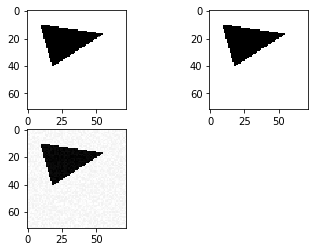

In [107]:
test_idx = 17

t = X_test_5[test_idx].reshape(1,72,72,1)
result = model_5.predict(t)


plt.subplot(222)
plt.imshow(Y_test_5[test_idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(221)
plt.imshow(result.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(223)
plt.imshow(X_test_5[test_idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [108]:
model_5.evaluate(X_test_5, Y_test_5)

1000/1000 [==============================] - 1s 847us/step


2.6253730271491804e-05

In [110]:
from keras.models import load_model

loaded_model = load_model('denoising_model_v2.h5', custom_objects={'custom_loss': custom_loss})

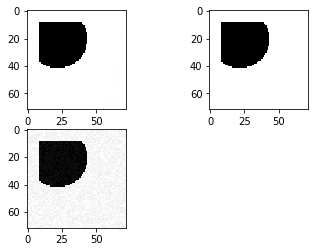

In [111]:
test_idx = 999

t = X_test_5[test_idx].reshape(1,72,72,1)
result = loaded_model.predict(t)


plt.subplot(222)
plt.imshow(Y_test_5[test_idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(221)
plt.imshow(result.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.subplot(223)
plt.imshow(X_test_5[test_idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [112]:
loaded_model.evaluate(X_test_5, Y_test_5)

1000/1000 [==============================] - 1s 976us/step


0.00017015147785423324